In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
dataset=pd.read_csv("diabetes_original.csv")

In [5]:
dataset

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,138,62,35,0,33.6,0.127,47,1
1,84,82,31,125,38.2,0.233,23,0
2,145,0,0,0,44.2,0.630,31,1
3,135,68,42,250,42.3,0.365,24,1
4,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...
1995,75,64,24,55,29.7,0.370,33,0
1996,179,72,42,130,32.7,0.719,36,1
1997,85,78,0,0,31.2,0.382,42,0
1998,129,110,46,130,67.1,0.319,26,1


# printing the first 5 rows of dataset

In [6]:
dataset.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,138,62,35,0,33.6,0.127,47,1
1,84,82,31,125,38.2,0.233,23,0
2,145,0,0,0,44.2,0.630,31,1
3,135,68,42,250,42.3,0.365,24,1
4,139,62,41,480,40.7,0.536,21,0


### Number of rows and columns in this dataset

In [7]:
dataset.shape

(2000, 8)

#getting the statistical measures of the data

In [8]:
dataset.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [9]:
dataset.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
dataset['Outcome'].value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [11]:
dataset.groupby('Outcome').mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


In [12]:
x = dataset.drop(columns ="Outcome",axis=1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,138,62,35,0,33.6,0.127,47
1,84,82,31,125,38.2,0.233,23
2,145,0,0,0,44.2,0.630,31
3,135,68,42,250,42.3,0.365,24
4,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...
1995,75,64,24,55,29.7,0.370,33
1996,179,72,42,130,32.7,0.719,36
1997,85,78,0,0,31.2,0.382,42
1998,129,110,46,130,67.1,0.319,26


# Outcome countplot

<Axes: xlabel='Outcome', ylabel='count'>

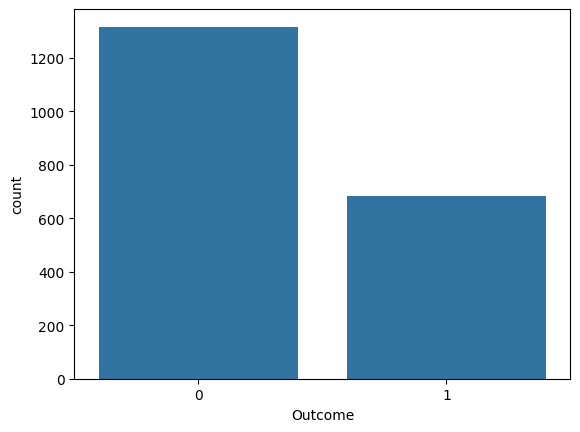

In [13]:
sns.countplot(x = 'Outcome',data = dataset)

# eg: histogram of all columns

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'SkinThickness'}>],
       [<Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

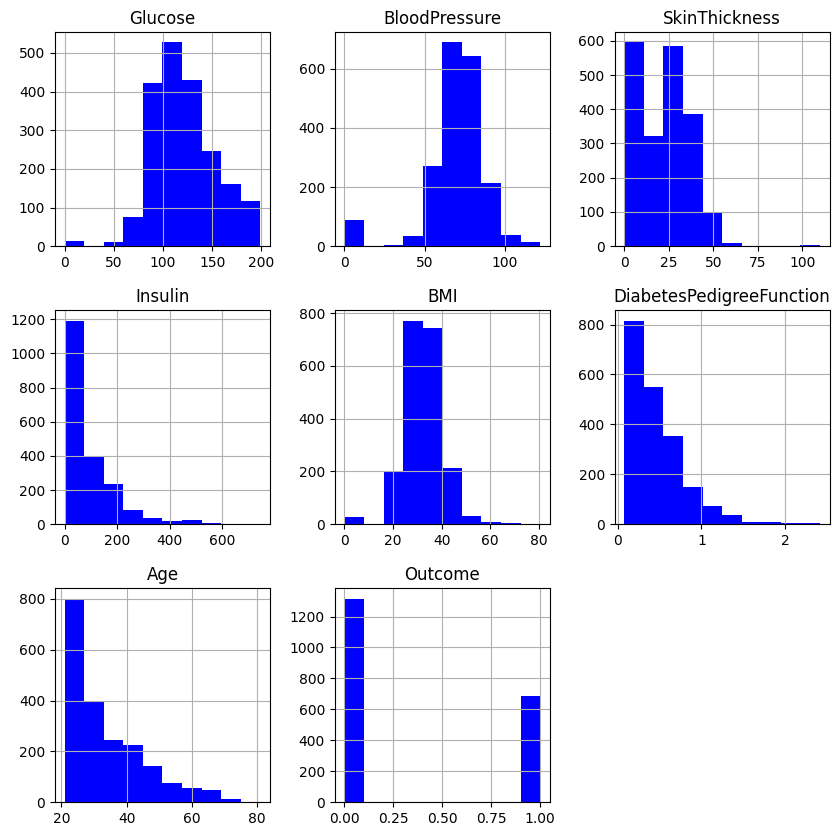

In [14]:
dataset=pd.read_csv("diabetes_original.csv")
dataset.hist(figsize=(10,10),color='blue')

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaler.fit(x)

StandardScaler()

In [17]:
Standardized_data = scaler.transform(x)
print(Standardized_data)

[[ 0.52455322 -0.37248123  0.87364499 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.1597562   0.67008046  0.6251857  ...  0.73724853 -0.7355513
  -0.85632626]
 [ 0.74288962 -3.60442246 -1.30037383 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [-1.12856529  0.46156812 -1.30037383 ... -0.12187245 -0.27492362
   0.75610116]
 [ 0.24383498  2.12966682  1.55690806 ...  4.28419085 -0.46968566
  -0.60173245]
 [-1.25332895  0.14879962 -0.36865148 ... -0.25687717  0.23516743
  -0.68659705]]


In [18]:
x = Standardized_data
y = dataset["Outcome"]

In [19]:
print(x)
print(y)

[[ 0.52455322 -0.37248123  0.87364499 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.1597562   0.67008046  0.6251857  ...  0.73724853 -0.7355513
  -0.85632626]
 [ 0.74288962 -3.60442246 -1.30037383 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [-1.12856529  0.46156812 -1.30037383 ... -0.12187245 -0.27492362
   0.75610116]
 [ 0.24383498  2.12966682  1.55690806 ...  4.28419085 -0.46968566
  -0.60173245]
 [-1.25332895  0.14879962 -0.36865148 ... -0.25687717  0.23516743
  -0.68659705]]
0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,stratify=y,random_state=2)

# Checking dimensions

In [21]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (1600, 7)
X_test shape: (400, 7)
Y_train shape: (1600,)
Y_test shape: (400,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=24)

# Support Vector Classifier Algorithm

In [23]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

# Decision tree Algorithm

In [24]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

# Random forest Algorithm

In [25]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

# Making predictions on test dataset

In [26]:
y_pred_knn = knn.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_dectree = dectree.predict(x_test)
y_pred_ranfor = ranfor.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_dectree = accuracy_score(y_test, y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, y_pred_ranfor)


# Accuracy on test set

In [28]:
print("K-Nearest Neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

K-Nearest Neighbors: 79.5
Support Vector Classifier: 79.25
Decision tree: 96.75
Random Forest: 97.75


# Confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score 
cm = confusion_matrix(y_test, y_pred_ranfor)
cm

array([[259,   4],
       [  5, 132]], dtype=int64)

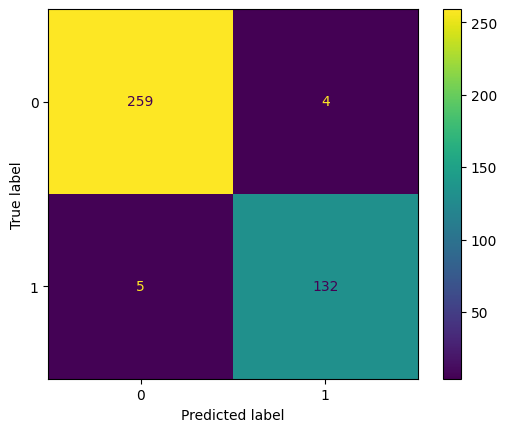

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ranfor)

In [31]:
print(classification_report(y_test, y_pred_ranfor))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       263
           1       0.97      0.96      0.97       137

    accuracy                           0.98       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.98      0.98       400



In [32]:
accuracy_score(y_train, ranfor.fit(x_train, y_train).predict(x_train))

0.99875

In [33]:
# !pip install joblib

You should consider upgrading via the 'C:\Users\Pratiksha\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [34]:
import joblib

In [35]:
joblib.dump(ranfor, 'model1.pkl')
joblib.dump(scaler, 'scaler1.pkl')

['scaler1.pkl']